In [1]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras, feature_column
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_hub as hub
import PIL.Image as Image
import tensorflow_datasets as tfds

from IPython.core.interactiveshell import InteractiveShell


In [2]:
# 配置项
# 这个要放到设置中文之前否则还是小方框
plt.style.use("seaborn")

# 指定默认字体 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# #全部行都能输出
InteractiveShell.ast_node_interactivity = "all"

In [5]:
v = tf.Variable(3.0)
assert v.numpy() == 3.0

# 通过assign函数更新旧值
# 重新赋值
v.assign(6)
assert v.numpy() == 6.0

v.assign(tf.square(v))
assert v.numpy() == 36

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=6.0>

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=36.0>

### 自定义线性数据 并训练模型

In [13]:
class Model(object):
    def __init__(self):
        # 初始化w和b的值 这你可以随机初始化
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
        
    def __call__(self, x):
        # y = w * x + b
        return self.w * x + self.b

# 损失函数
def loss(y_true, y_pred):
    # 均方误差
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [12]:
model = Model()
# 测试模型
assert model(3).numpy() == 15.0

In [16]:
# 模拟数据
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

x = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])

y = TRUE_W * x + TRUE_b + noise


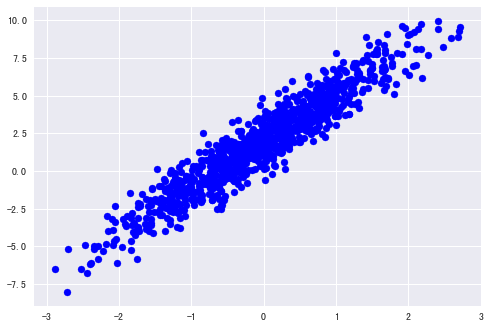

In [17]:
# 画出这些散点图
plt.scatter(x, y, c='b')
plt.show()

In [19]:
# 训练前的MSE
print('Current loss: '),
print(loss(model(x), y).numpy())

Current loss: 


(None,)

8.939884


In [23]:
# 定义训练
def train(model, x, y, learning_rate=0.001):
    with tf.GradientTape() as t:
        # 计算均方误差
        curr_loss = loss(y, model(x))
    # 计算w,b的梯度向量
    dw, db = t.gradient(curr_loss, [model.w, model.b])
    # 更新w,b
    model.w.assign_sub(dw * learning_rate)
    model.b.assign_sub(db * learning_rate)
    

    

In [32]:
# 训练模型
model = Model()
ws = []
bs = []
epochs = range(1000)

for i in epochs:
    ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    train(model, x, y, learning_rate=0.01)
    curr_loss = loss(y, model(x))
    if curr_loss < 0.0001:
        break
    if i % 50 == 0:
        print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (i, ws[-1], bs[-1], curr_loss))

Epoch  0: W=5.00 b=0.00, loss=8.62660
Epoch 50: W=3.78 b=1.31, loss=2.02323
Epoch 100: W=3.32 b=1.77, loss=1.14049
Epoch 150: W=3.14 b=1.94, loss=1.02197
Epoch 200: W=3.08 b=2.00, loss=1.00598
Epoch 250: W=3.05 b=2.02, loss=1.00381
Epoch 300: W=3.04 b=2.02, loss=1.00351
Epoch 350: W=3.04 b=2.03, loss=1.00347
Epoch 400: W=3.04 b=2.03, loss=1.00346
Epoch 450: W=3.04 b=2.03, loss=1.00346
Epoch 500: W=3.04 b=2.03, loss=1.00346
Epoch 550: W=3.04 b=2.03, loss=1.00346
Epoch 600: W=3.04 b=2.03, loss=1.00346
Epoch 650: W=3.04 b=2.03, loss=1.00346
Epoch 700: W=3.04 b=2.03, loss=1.00346
Epoch 750: W=3.04 b=2.03, loss=1.00346
Epoch 800: W=3.04 b=2.03, loss=1.00346
Epoch 850: W=3.04 b=2.03, loss=1.00346
Epoch 900: W=3.04 b=2.03, loss=1.00346
Epoch 950: W=3.04 b=2.03, loss=1.00346


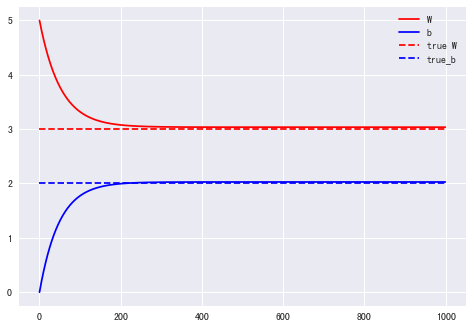

In [34]:
# 显示所有
plt.plot(epochs, ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()